In [42]:
import pandas as pd
import numpy as np

from Bio import SeqIO
from Bio import Entrez
import os
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import Phylo, AlignIO

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw

import matplotlib.pyplot as plt

Entrez.email='simon.burgermeister@gmail.com'

## Exploration on genbank data:
<br>
<br>

### Human ACE2 protein sequence:
<br>
<br>

In [87]:
ref_id='BAB40370'

#BAB40370
handle = Entrez.efetch(db='protein', id=ref_id, rettype='gb')
print(handle.read())
handle.close()

LOCUS       ABW16956                 804 aa            linear   MAM 21-OCT-2009
DEFINITION  angiotensin converting enzyme 2 [Nyctereutes procyonoides].
ACCESSION   ABW16956
VERSION     ABW16956.1
DBSOURCE    accession EU024940.1
KEYWORDS    .
SOURCE      Nyctereutes procyonoides (raccoon dog)
  ORGANISM  Nyctereutes procyonoides
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Laurasiatheria; Carnivora; Caniformia; Canidae;
            Nyctereutes.
REFERENCE   1  (residues 1 to 804)
  AUTHORS   Xu,L., Zhang,Y., Liu,Y., Chen,Z., Deng,H., Ma,Z., Wang,H., Hu,Z.
            and Deng,F.
  TITLE     Angiotensin-converting enzyme 2 (ACE2) from raccoon dog can serve
            as an efficient receptor for the spike protein of severe acute
            respiratory syndrome coronavirus
  JOURNAL   J. Gen. Virol. 90 (PT 11), 2695-2703 (2009)
   PUBMED   19625462
REFERENCE   2  (residues 1 to 804)
  AUTHORS   Xu,L., Ma,Z., Hu,Z., Wang,H.

### Rhinopithecus roxellana ACE2:
<br>
<br>

In [31]:

ref_id='XP_010364367'

handle = Entrez.efetch(db='protein', id=ref_id, rettype='gb')
print(handle.read())
handle.close()

LOCUS       XP_010364367             805 aa            linear   PRI 25-SEP-2019
DEFINITION  angiotensin-converting enzyme 2 [Rhinopithecus roxellana].
ACCESSION   XP_010364367
VERSION     XP_010364367.2
DBLINK      BioProject: PRJNA565017
DBSOURCE    REFSEQ: accession XM_010366065.2
KEYWORDS    RefSeq.
SOURCE      Rhinopithecus roxellana (golden snub-nosed monkey)
  ORGANISM  Rhinopithecus roxellana
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Cercopithecidae; Colobinae; Rhinopithecus.
COMMENT     MODEL REFSEQ:  This record is predicted by automated computational
            analysis. This record is derived from a genomic sequence
            (NC_044555.1) annotated using gene prediction method: Gnomon,
            supported by mRNA and EST evidence.
            Also see:
                Documentation of NCBI's Annotation Process
            
            On 

## Combine sequences of interest from different organisms:
<br>
<br>

In [78]:
## Code for uniprot extraction:

#from Bio import ExPASy
#from Bio import SwissProt
#handle = ExPASy.get_sprot_raw('B4XEP4')
#record = SwissProt.read(handle)
#print(str(record.sequence))
#print(type(record.sequence))record = SeqRecord(Seq(record.sequence, IUPAC.protein), id="YP_025292.1", name=record.accessions[0], description=record.organism)
#handle = Entrez.efetch(db='protein', id='B4XEP4_NYCPR', rettype='gb')

In [94]:
## Uniprot ID:
#lst_id=['Q9BYF1', 'E2DHI3', 'B6ZGN7', 'B4XEP4', 'J9P7Y2']
#lst_sp=['homo sapiens', 'Rhinolophus macrotis', 'Rhinolophus ferrumequinum', 'Nyctereutes procyonoides', 'Canis lupus familiaris']

##Genbank ID:

lst_id=['BAB40370', 'ADN93471', 'BAH02663', 'Q5EGZ1', 'XP_017505752', 'ADN93472', 'ABW16956', 'XP_032187679']
lst_sp=['Homo sapiens', 'Rhinolophus macrotis', 'Rhinolophus ferrumequinum', 'Rattus Norvegicus', 'Manis javanica', 'Rhinolophus sinicus', 'Nyctereutes procyonoides', 'Mustela erminea']

#Q9BYF1
#Mustela erminea
#cid='XP_032187679'

#Mustela putorius furo
#cid='BAE53380'

lst_record=[]
for iid in lst_id:
    print(iid)
    handle = Entrez.efetch(db='protein', id=iid, rettype='gb')
    record = SeqIO.read(handle, "genbank")
    
    ## Swissprot
    #handle = ExPASy.get_sprot_raw(iid)
    #record = SwissProt.read(handle)
    
    handle.close()
    lst_record.append(record)
    
SeqIO.write(lst_record, "sequences/ACE2_all.fasta", "fasta")
    

BAB40370
ADN93471
BAH02663
Q5EGZ1
XP_017505752
ADN93472
ABW16956
XP_032187679


8

## Align and make tree:
<br>
<br>

In [95]:
# Define input file
in_file = "sequences/ACE2_all.fasta"

# Define output file
out_file = "sequences/ace2_aligned.fasta"

# Get the command for Clustal Omega
###sudo apt-get install -y clustalo
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True,  force=True)

# Print the executable command
print(clustalomega_cline)
clustalomega_cline()

clustalo -i sequences/ACE2_all.fasta -o sequences/ace2_aligned.fasta --auto -v --force


('Using 8 threads\nRead 8 sequences (type: Protein) from sequences/ACE2_all.fasta\nnot more sequences (8) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 7 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 8 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 35)\nKtuple-distance calculation progress: 2 % (1 out of 35)\nKtuple-distance calculation progress: 5 % (2 out of 35)\nKtuple-distance calculation progress: 8 % (3 out of 35)\nKtuple-distance calculation progress: 11 % (4 out of 35)\nKtuple-distance calculation progress: 14 % (5 out of 35)\nKtuple-distance calculation progress: 17 % (6 out of 35)\nKtuple-distance calculation progress done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00\nmBed created 1 cluster/s

In [96]:
align = AlignIO.read("sequences/ace2_aligned.fasta", "fasta")
print(align)

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

Alignment with 8 rows and 805 columns
MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSS...TSF BAB40370.1
MSGSFWLLLSLVAVTAAQSTTEDEAKKFLDKFNSKAEDLSYESS...TSF ADN93471.1
MSGSSWLLLSLVAVTAAQSTTEDLAKKFLDDFNSEAENLSHQSS...TSF BAH02663.1
MSSSCWLLLSLVAVATAQSLIEEKAESFLNKFNQEAEDLSYQSS...TSF Q5EGZ1.1
MSGSSWLLLSLVAVTAAQSTSDEEAKTFLEKFNSEAEELSYQSS...TSF XP_017505752.1
MSGSFWFLLSLVAVTTAQSTTEDEAKIFLDKFNTKAEDLSHQSS...TSF ADN93472.1
MSGSSWLLLSLAALTAAQST-EDLVNTFLEKFNYEAEELSYQSS...TSF ABW16956.1
MLGSSWLLLSLAALTAAQSTTEDLAKTFLEKFNYEAEELSYQNS...TSF XP_032187679.1



Distance Matrix:
-----------------------
BAB40370.1	0
ADN93471.1	0.1925465838509317	0
BAH02663.1	0.18881987577639747	0.07453416149068326	0
Q5EGZ1.1	0.1751552795031056	0.2211180124223603	0.21614906832298142	0
XP_017505752.1	0.15279503105590064	0.16273291925465838	0.17018633540372674	0.17391304347826086	0
ADN93472.1	0.19875776397515532	0.047204968944099424	0.075776397515528	0.2273291925465839	0.177639751552795	0
ABW16956.1	0.16149068322981364	0.1838509316770186	0.18509316770186335	0.1863354037267081	0.13291925465838506	0.19378881987577645	0
XP_032187679.1	0.17142857142857137	0.1863354037267081	0.18881987577639747	0.19751552795031058	0.1341614906832298	0.1950310559006211	0.09813664596273297	0
	BAB40370.1	ADN93471.1	BAH02663.1	Q5EGZ1.1	XP_017505752.1	ADN93472.1	ABW16956.1	XP_032187679.1

Phylogenetic Tree:
-----------------------


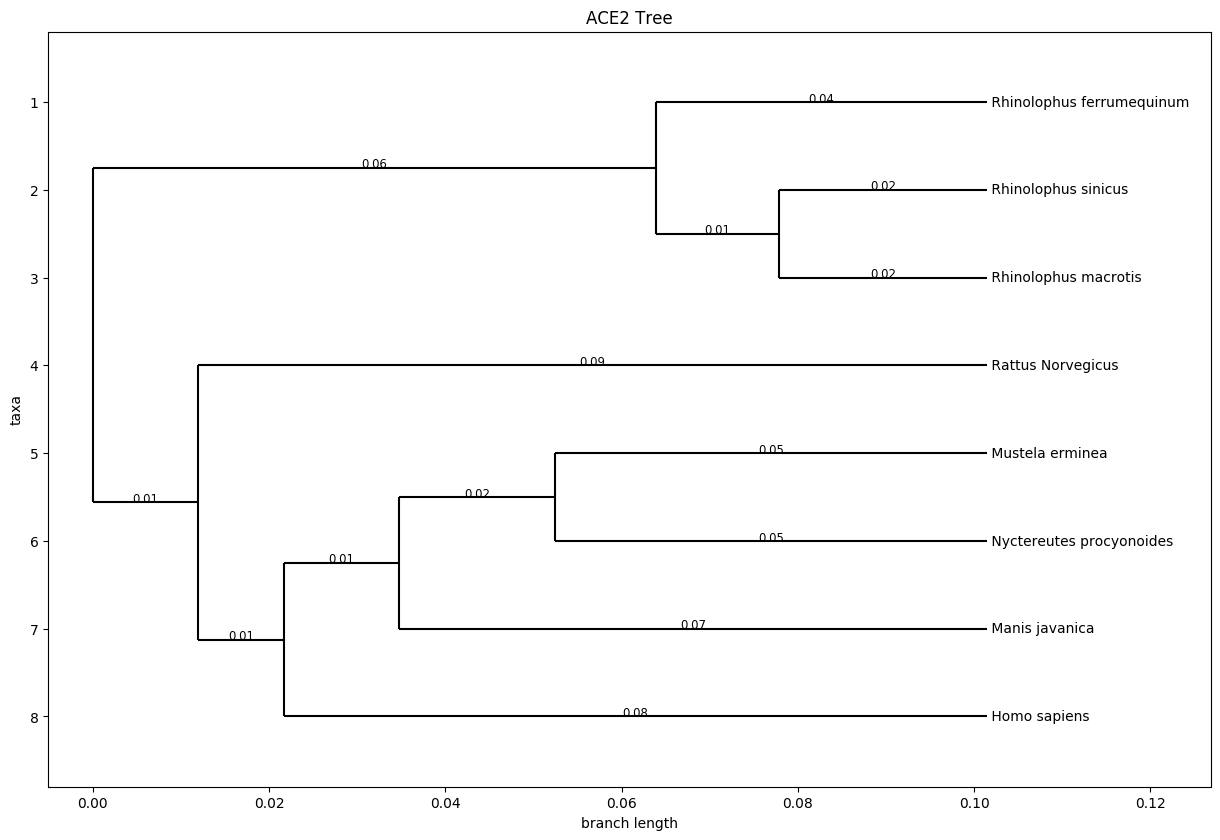

In [97]:
code=lst_id
host=lst_sp


def get_label(leaf):
    #code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934', 'MT084071']
    #host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat', 'Pangolin']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:
        
        for i in range(0, len(code)):
            if leaf.name.startswith(code[i]):
                name=host[i]
                return name
            
            #return ''
        #name=leaf.name

    #return name


print('\nDistance Matrix:\n-----------------------')
print(dm)

# Phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm) # We color the human strain, SARS and SARS-CoV-2 in blue
#tree.clade[1, 1, 0].color = "black"
#mrca = tree.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
#mrca.color = "red"

fig = plt.figure(figsize=(15, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.title('ACE2 Tree')
plt.savefig('tree.png')

print('\nPhylogenetic Tree:\n-----------------------')
#Phylo.draw_ascii(tree)

## key amino acids:

<br>
<br>

In [121]:
# key amino acid (1 indexing)
#key_AA=[24, 27, 28, 30, 31, 34, 35, 37, 38, 41, 42, 45, 82, 83, 330, 353, 354, 355, 357, 393]

# key amino acid (0 indexing)
key_AA=[23, 26, 27, 29, 30, 33, 34, 36, 37, 40, 41, 44, 81, 82, 329, 352, 353, 354, 356, 392]

    

In [125]:
lst_kaa=[]
for i, rec in enumerate(lst_record):
    sseq=str(rec.seq)
    kaa_seq=''
    for kaa in key_AA:
        kaa_seq=kaa_seq+sseq[kaa]
    
    lst_kaa.append(kaa_seq)
    print(kaa_seq, ' : ', lst_sp[i])
#print(lst_kaa)

QTFDKHEEDYQLMYNKGDRR  :  Homo sapiens
EKFDKSKEDYELNYKKGDRR  :  Rhinolophus macrotis
LKFDDSEENHQLNFNKGDRR  :  Rhinolophus ferrumequinum
KSFNKQEEDYQLNFNHGDRR  :  Rattus Norvegicus
ETFEKSEEEYQLNYNKHDRR  :  Manis javanica
EIFDKTKEDHQLNYNKGDRR  :  Rhinolophus sinicus
VFLKFEAELQSAYPSGDFIN  :  Nyctereutes procyonoides
LTFEKYEEEYQLTYNKRDRR  :  Mustela erminea
